In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings('ignore') 

In [1]:
with open("sp500_list.txt", "r") as f:
    sp500_list = [line.strip() for line in f]

In [3]:
rfdata = pd.read_csv("market_data.csv", index_col=0, low_memory=False)
rfdata = rfdata.drop(rfdata.index[[0,1]])
rfdata.columns = pd.MultiIndex.from_arrays([["Adj Close"]*503 + ["Volume"]*503, sp500_list*2])
rfdata.index = pd.core.indexes.datetimes.DatetimeIndex(rfdata.index)
rfdata = rfdata.astype(float)

data = rfdata["Adj Close"]
data = data.dropna(axis=1)

In [72]:
data[:"2022-12-31"]

,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
2012-01-03,23.452354,4.826836,12.433825,21.276012,12.493333,42.139866,28.570000,27.088427,20.861462,36.140427,...,17.623835,81.378044,12.017909,84.649750,18.264717,52.614315,21.305161,33.329346,47.259995,35.720001
2012-01-04,23.265926,4.741990,12.500645,21.193491,12.266667,42.123951,28.280001,27.050842,21.208067,36.100613,...,17.457529,80.916603,11.885774,83.194000,18.144459,52.626541,22.008551,33.556980,46.620407,35.450001
2012-01-05,23.786655,5.156796,12.639430,21.144733,12.500000,41.320160,28.480000,27.171131,21.114191,36.366077,...,17.476002,82.321846,11.816563,82.324966,18.224625,52.467487,21.694986,33.813053,47.172401,35.400002
2012-01-06,24.043812,5.279351,12.771558,20.953428,12.486667,41.248528,28.719999,26.990690,20.991438,36.419163,...,17.531435,81.629684,11.967570,79.428307,18.171183,52.075928,21.330578,34.057732,47.295048,35.110001
2012-01-09,24.673836,5.392481,12.751301,20.949678,12.396667,41.176899,28.530001,27.516968,20.875900,36.279797,...,17.568396,80.937576,11.822856,79.205482,18.184542,52.308403,21.415331,33.926857,47.645531,34.950001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,147.692978,12.710000,130.959961,105.548424,63.380001,259.968933,338.450012,160.024155,91.612839,234.232559,...,234.454590,239.221451,29.621929,79.901894,67.391136,104.124245,108.006195,125.889427,125.478523,248.220001
2022-12-27,148.009705,12.530000,129.142441,105.928917,63.619999,259.206848,335.089996,158.422348,92.861839,234.320053,...,236.050003,239.407425,29.603115,83.475304,67.999199,105.570953,108.980629,126.866081,126.062874,251.000000
2022-12-28,146.564713,12.320000,125.179680,105.206924,62.599998,257.067261,328.329987,156.547073,90.644615,231.228561,...,230.575775,236.627502,28.812944,79.278267,67.509399,103.836815,107.228592,126.289864,124.785202,246.839996
2022-12-29,149.533813,12.700000,128.725311,107.626602,63.110001,262.206299,337.579987,160.160919,90.160507,233.921463,...,238.293533,240.870514,29.462009,80.436424,67.987717,104.622437,109.886177,126.953987,126.607613,257.529999


In [10]:
ben = pd.read_csv("LIN1score.csv", index_col=0)
sp500=yf.download("SPY", start= "2022-12-30", end= "2024-01-01")["Adj Close"].pct_change().dropna()
sp500_price = yf.download("SPY", start= "2022-12-30", end= "2024-01-01")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [434]:
def portf_return7(pred):
    data_week = data.resample("W").last().pct_change().dropna()
    pred = pred["2022-12-31":]
    portfolio_return = []
    for i in range(len(pred.index)):
        weekly_return = dict(pred.loc[pred.index[i]])
        sorted_return = dict(sorted(weekly_return.items(), key = lambda x: -x[1]))
        stocks_to_invest = list(sorted_return.keys())[:40]
        portfolio_return.append(data_week.loc[data_week.index[i]][stocks_to_invest].mean())
        
    return portfolio_return

In [ ]:
for i in pred_lin7.index:
    weekly_return = dict(pred_lin7.loc[i])
    sorted_return = dict(sorted(weekly_return.items(), key = lambda x: -x[1]))
    stocks_to_invest = list(sorted_return.keys())[:40]
    portfolio_return.append(data.resample("W").last().pct_change().dropna().loc[i][stocks_to_invest].mean())

In [476]:
def portf_return(pred):
    pred = pred["2022-12-31":]
    portfolio_return = []
    for i in pred.index:
        weekly_return = dict(pred.loc[i])
        sorted_return = dict(sorted(weekly_return.items(), key = lambda x: -x[1]))
        stocks_to_invest = list(sorted_return.keys())[:40]
        portfolio_return.append(data_ret.loc[i][stocks_to_invest].mean())
        
    return portfolio_return

In [475]:
def func_score(pred, score):
    pred = pred["2022-12-31":]
    corr = []
    for i in data.columns:
        corr.append((data_ret[i]["2022-12-31":]).corr(pred[i]))
        
    score["benchmark"] = ben["benchmark"]
    score["correlation"] = corr
    
    return score
    

In [306]:
def func_score7(pred, score):
    pred = pred["2022-12-31":]
    corr = []
    for i in data.columns:
        corr.append((data_ret[i]["2022-12-31":].resample("W").last()).corr(pred[i]))
        
    score["benchmark"] = ben["benchmark"]
    score["correlation"] = corr
    
    return score

In [7]:
data_ret = data.pct_change().dropna()

# RF1

In [195]:
score_fr1 = pd.read_csv("RF1score.csv", index_col = 0)

pred_rf1  = pd.read_csv("RF1pred.csv", index_col =0)
pred_rf1 = pred_rf1.drop(pred_rf1.index[0])
pred_rf1.index = data["2022-12-31":].index

In [239]:
RF1_score = func_score(pred_rf1, score_rf1)
RF1_score.mean()

score_train    0.085606
score_test    -0.057209
benchmark     -0.004352
correlation    0.040853
dtype: float64

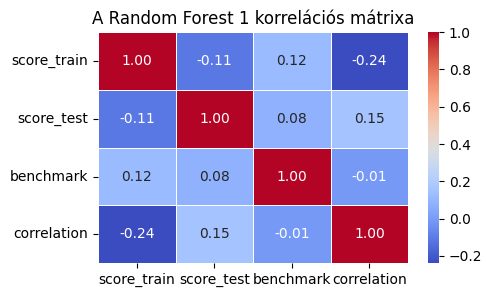

In [450]:
RF1_score = func_score(pred_rf1, score_rf1)
correlation_matrix = RF1_score.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("A Random Forest 1 korrelációs mátrixa")
plt.show()

In [212]:
portfolio_return = portf_return(pred_rf1)

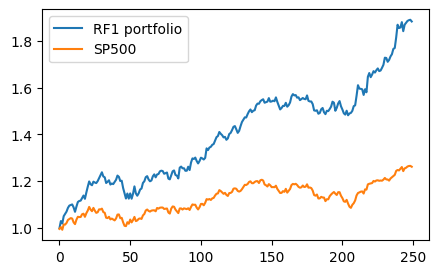

1.8832760891050921

In [490]:
portfolio_return = portf_return(pred_rf1)

a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500)+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "RF1 portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()
a[-1]

# KNN1

In [203]:
score_knn1 = pd.read_csv("KNN1score.csv", index_col=0)

pred_knn1  = pd.read_csv("KNN1pred.csv", index_col =0)
pred_knn1 = pred_knn1.drop(pred_knn1.index[0])
pred_knn1.index = data["2022-12-31":].index

In [208]:
KNN1_score = func_score(pred_knn1, score_knn1)
KNN1_score.mean()

score_train    0.113815
score_test    -0.109042
benchmark     -0.004352
correlation    0.047081
dtype: float64

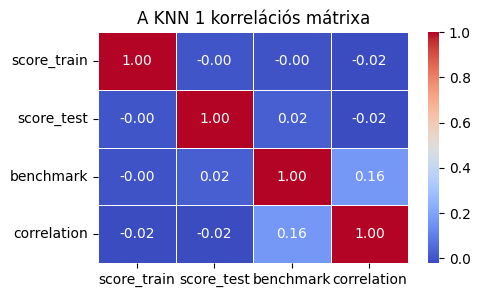

In [456]:
correlation_matrix = KNN1_score.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("A KNN 1 korrelációs mátrixa")
plt.show()

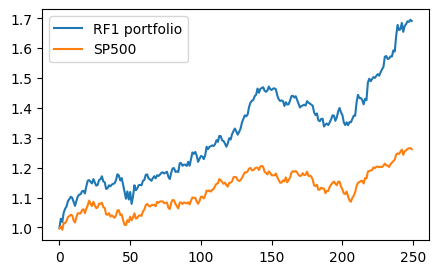

1.6908068549782789

In [489]:
portfolio_return = portf_return(pred_knn1)

a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500)+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "KNN1 portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()
a[-1]

# RF2

In [218]:
score_rf2 = pd.read_csv("RF2score.csv", index_col=0)

pred_rf2  = pd.read_csv("RF2pred.csv", index_col =0)
pred_rf2.index = data["2022-12-31":].index

In [237]:
score_rf2.mean()

score_train    0.078952
score_test    -0.027274
benchmark     -0.004352
correlation    0.005215
dtype: float64

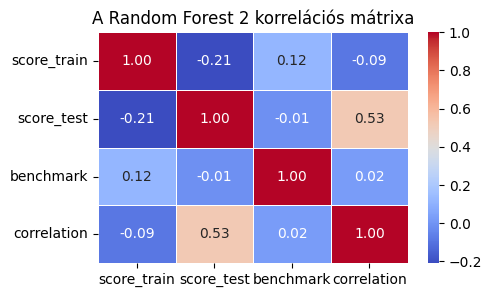

In [454]:
RF2_score = func_score(pred_rf2, score_rf2)
correlation_matrix = RF2_score.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("A Random Forest 2 korrelációs mátrixa")
plt.show()

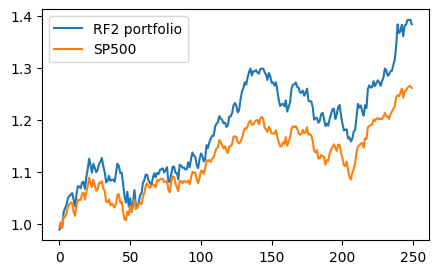

In [479]:
portfolio_return = portf_return(pred_rf2)

a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500)+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "RF2 portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()

# KNN2

In [236]:
score_knn2 = pd.read_csv("KNN2score.csv", index_col=0)

pred_knn2  = pd.read_csv("KNN2pred.csv", index_col =0)
pred_knn2 = pred_knn2.drop(pred_knn2.index[0])
pred_knn2.index = data["2022-12-31":].index

In [305]:
KNN2_score = func_score(pred_knn2, score_knn2)
KNN2_score.mean()

score_train    0.061398
score_test    -0.052859
benchmark     -0.004352
correlation    0.000174
dtype: float64

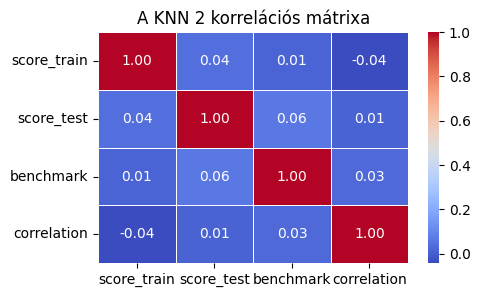

In [458]:
correlation_matrix = KNN2_score.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("A KNN 2 korrelációs mátrixa")
plt.show()

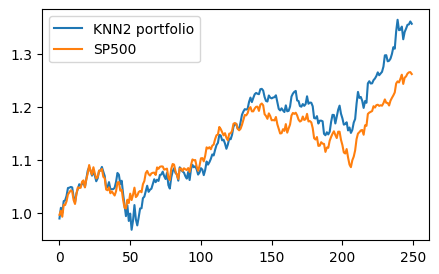

In [480]:
portfolio_return = portf_return(pred_knn2)

a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500)+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "KNN2 portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()

# LIN1

In [394]:
score_lin1 = pd.read_csv("LIN1score.csv", index_col=0)

pred_lin1 = pd.read_csv("LIN1pred.csv", index_col=0)
pred_lin1.index = data["2022-12-31":].index

In [399]:
score_lin1.mean()

score_train    0.003966
score_test    -0.005593
benchmark     -0.004352
p_value        0.186823
correlation    0.007811
dtype: float64

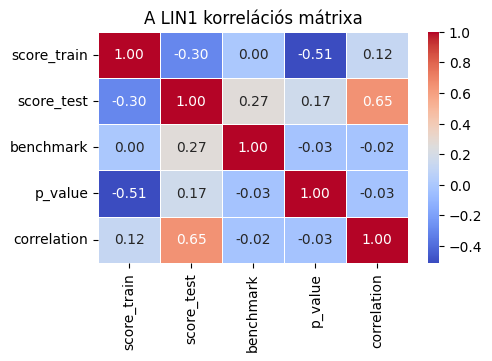

In [460]:
correlation_matrix = score_lin1.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("A LIN1 korrelációs mátrixa")
plt.show()

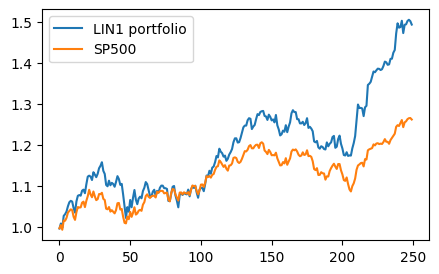

In [487]:
portfolio_return = portf_return(pred_lin1)

a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500)+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "LIN1 portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()

In [412]:
data_week = data.resample("W").last().pct_change().dropna()
data_week

,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA
2012-01-15,0.044385,0.066072,-0.006132,0.000864,-0.007742,0.027397,0.008705,0.020056,0.003440,0.001275,...,0.013644,-0.006166,0.063092,0.008509,-0.016544,-0.002820,0.018276,0.027941,0.019637,-0.003987
2012-01-22,0.049668,0.067001,0.001167,0.005954,0.006188,0.048075,0.052813,0.086292,0.029825,0.033485,...,0.041525,-0.007756,0.021266,0.070654,-0.005607,0.030749,0.028482,0.020415,0.018350,0.074635
2012-01-29,0.040975,0.284145,0.064193,-0.013272,-0.033155,0.010930,0.018033,-0.010558,-0.007324,-0.025532,...,0.017804,0.009119,-0.008717,0.031177,0.014285,-0.018974,-0.020864,0.005922,0.079393,0.008515
2012-02-05,0.060918,0.178484,0.027723,-0.000363,0.026825,0.033499,0.025765,0.018293,-0.009054,0.003072,...,0.042128,0.013684,0.040547,-0.034350,-0.017050,-0.010602,0.047268,0.015752,0.033223,0.036412
2012-02-12,-0.025176,-0.081950,0.073399,0.002000,0.021546,-0.023152,0.011303,-0.015470,0.034518,-0.027022,...,-0.038534,-0.005604,-0.060094,-0.015481,-0.000754,-0.007788,0.001480,0.014097,-0.026716,-0.000764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03,0.017138,0.057677,0.006685,0.019539,-0.045843,0.012034,-0.011236,0.004822,0.010498,0.009885,...,-0.004161,0.004626,-0.000270,-0.035783,0.015036,-0.015110,0.028472,-0.004495,0.040025,0.053731
2023-12-10,-0.012346,0.056836,0.023374,-0.003528,-0.040300,-0.002455,-0.004016,0.009887,-0.017714,-0.009789,...,-0.027147,-0.011206,-0.027410,-0.011274,-0.008465,-0.033401,0.001695,-0.023482,-0.005679,-0.021101
2023-12-17,0.075314,0.053052,0.009504,0.026600,-0.074149,0.020520,-0.041524,0.086543,0.027119,0.021241,...,0.046634,-0.024437,0.080013,0.054282,0.011000,0.013561,0.040797,0.034583,0.011850,0.144200
2023-12-24,0.020398,-0.012422,-0.020094,0.016218,0.005720,0.029929,0.024064,-0.018817,-0.056634,-0.013539,...,-0.009129,0.014193,0.030594,0.018702,0.007795,0.010010,0.017341,0.010572,0.015755,-0.002850


In [442]:
def portf_return7(pred):
    data_week = data.resample("W").last().pct_change().dropna()
    pred = pred["2022-12-31":]
    portfolio_return = []
    for i in range(len(pred.index)):
        weekly_return = dict(pred.loc[pred.index[i]])
        sorted_return = dict(sorted(weekly_return.items(), key = lambda x: -x[1]))
        stocks_to_invest = list(sorted_return.keys())[:40]
        
        portfolio_return.append(data_week.loc[data_week.index[i]][stocks_to_invest].mean())
        
    return portfolio_return

# LIN7

In [407]:
score_lin7 = pd.read_csv("LIN7score.csv", index_col=0)

pred_lin7 = pd.read_csv("LIN7pred.csv", index_col=0)
pred_lin7.index = data["2022-12-31":].resample("W").last().index

In [408]:
score_lin7
score_lin7.mean()

score_train    0.009246
score_test    -0.019002
benchmark     -0.021214
p_value        0.232417
correlation    0.029035
dtype: float64

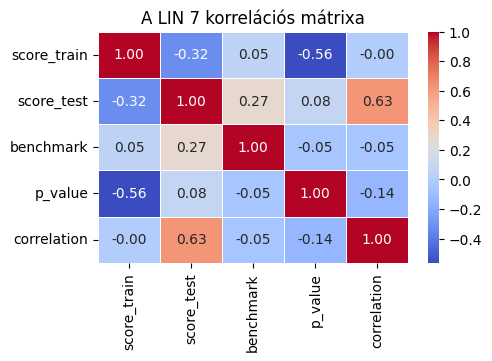

In [462]:
correlation_matrix = score_lin7.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("A LIN 7 korrelációs mátrixa")
plt.show()

In [ ]:
def portf_return(pred):
    pred = pred["2022-12-31":]
    portfolio_return = []
    for i in range(len(pred.index)):
        weekly_return = dict(pred.loc[pred.index[i]])
        sorted_return = dict(sorted(weekly_return.items(), key = lambda x: -x[1]))
        stocks_to_invest = list(sorted_return.keys())[:40]
        portfolio_return.append(data_ret.loc[data_ret.index[i]][stocks_to_invest].mean())
        
    return portfolio_return

In [471]:
pred_lin7.loc["2023-01-08"]

A       0.003724
AAL     0.002540
AAPL    0.005448
ABT     0.002084
ACGL    0.005866
          ...   
XOM     0.002175
XYL     0.003558
YUM     0.003434
ZBH     0.002129
ZBRA    0.003790
Name: 2023-01-08 00:00:00, Length: 448, dtype: float64

In [472]:
portfolio_return = []
for i in pred_lin7.index:
    weekly_return = dict(pred_lin7.loc[i])
    sorted_return = dict(sorted(weekly_return.items(), key = lambda x: -x[1]))
    stocks_to_invest = list(sorted_return.keys())[:40]
    portfolio_return.append(data.resample("W").last().pct_change().dropna().loc[i][stocks_to_invest].mean())

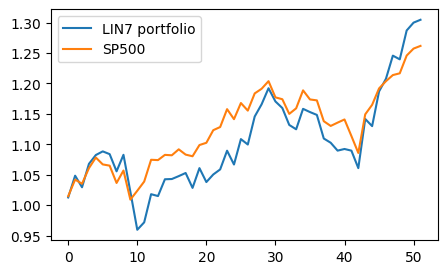

In [473]:
#portfolio_return = portf_return7(pred_lin7)


plt.figure(figsize=(5, 3))
a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500_price.resample("W").last().pct_change().dropna()["2023-01-01":])+1)

plt.plot(a, label = "LIN7 portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()

# ARIMA

In [354]:
score_arima = pd.read_csv("ARIMAscore.csv", index_col =0)

pred_arima = pd.read_csv("ARIMApred.csv" , index_col = 0)
pred_arima.index = data["2022-12-31":].index

In [531]:
ARIMA_score["model"].value_counts()
d2=ARIMA_score["model"].value_counts()
d2

model
(0, 0, 0)    122
(1, 0, 0)     74
(2, 0, 2)     39
(2, 0, 0)     35
(2, 0, 3)     21
(1, 0, 3)     20
(3, 0, 0)     20
(0, 0, 1)     20
(0, 0, 2)     19
(3, 0, 2)     17
(3, 0, 3)     15
(0, 0, 3)     14
(1, 0, 1)      9
(2, 0, 1)      8
(1, 0, 2)      7
(2, 1, 1)      3
(3, 0, 1)      1
(3, 1, 3)      1
(2, 1, 2)      1
(0, 1, 3)      1
(3, 1, 1)      1
Name: count, dtype: int64

In [526]:
d3 = dict(ARIMA_score.groupby('model')["score_train"].sum())

In [530]:
d=dict(ARIMA_score.groupby('model')["score_test"].sum())
d

{'(0, 0, 0)': -0.3622996433784738,
 '(0, 0, 1)': -0.11300492076790719,
 '(0, 0, 2)': -0.2715245121870589,
 '(0, 0, 3)': -0.24449947419968748,
 '(0, 1, 3)': 0.0060250230475936,
 '(1, 0, 0)': -0.530048860470187,
 '(1, 0, 1)': -0.0239055461140807,
 '(1, 0, 2)': -0.1379296073128401,
 '(1, 0, 3)': -0.2465003390654134,
 '(2, 0, 0)': -0.2722330710680852,
 '(2, 0, 1)': 0.033374739217962496,
 '(2, 0, 2)': -0.6315370538050756,
 '(2, 0, 3)': -0.3567000178319592,
 '(2, 1, 1)': -0.0339604921720337,
 '(2, 1, 2)': -0.0009393892504123,
 '(3, 0, 0)': -0.2783936328922011,
 '(3, 0, 1)': -0.0199061175138455,
 '(3, 0, 2)': -0.27959604620971873,
 '(3, 0, 3)': -0.361054407500084,
 '(3, 1, 1)': -0.0018126978079477,
 '(3, 1, 3)': -0.0241645025022232}

In [528]:
arima_model = pd.DataFrame({"model" : list(d.keys()), "score_test": list(d.values()), "score_train" : list(d3.values()), "count" : list(d2.values()) })
arima_model

,model,score_test,score_train,count
0,"(0, 0, 0)",-0.362300,-0.000008,122
1,"(0, 0, 1)",-0.113005,0.104637,74
2,"(0, 0, 2)",-0.271525,0.173007,39
3,"(0, 0, 3)",-0.244499,0.171520,35
4,"(0, 1, 3)",0.006025,-0.000460,21
5,"(1, 0, 0)",-0.530049,0.366851,20
6,"(1, 0, 1)",-0.023906,0.031926,20
7,"(1, 0, 2)",-0.137930,0.053036,20
8,"(1, 0, 3)",-0.246500,0.261298,19
9,"(2, 0, 0)",-0.272233,0.224216,17


In [360]:
arima_corr = ARIMA_score[["score_train", "score_test", "benchmark", "correlation"]]
arima_corr.mean()

score_train    0.007408
score_test    -0.009265
benchmark     -0.004352
correlation    0.005037
dtype: float64

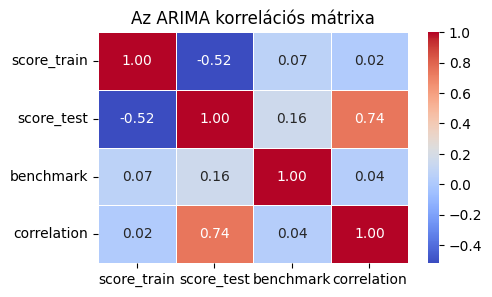

In [516]:
correlation_matrix = arima_corr.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Az ARIMA korrelációs mátrixa")
plt.show()

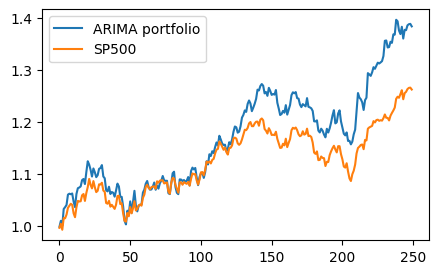

In [518]:
portfolio_return = portf_return(pred_arima)

a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500["2023-01-01":])+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "ARIMA portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()

# ARIMA7

In [519]:
score_arima7 = pd.read_csv("ARIMA7score.csv", index_col =0)

pred_arima7 = pd.read_csv("ARIMA7pred.csv" , index_col = 0)
pred_arima7.index = data["2022-12-31":].resample("W").last().index

In [521]:
corr = []
for i in data.columns:
    corr.append((data_ret[i]["2022-12-31":].resample("W").last()).corr(pred_arima7[i]))
    
score_arima7["correlation"] = corr
score_arima7["benchmark"] = score_lin7["benchmark"]   

In [522]:
arima7_corr = score_arima7[["score_train", "score_test", "benchmark", "correlation"]]
arima7_corr.mean()

score_train    0.017630
score_test    -0.025420
benchmark     -0.021214
correlation    0.000394
dtype: float64

In [391]:
d1 = dict(score_arima7["model"].value_counts())

model
(0, 0, 0)    117
(1, 0, 1)     94
(1, 0, 0)     58
(2, 0, 2)     41
(0, 0, 1)     34
(3, 0, 1)     14
(1, 0, 3)     13
(0, 0, 2)     13
(3, 0, 3)     11
(3, 0, 2)     11
(1, 0, 2)      9
(2, 0, 0)      8
(0, 0, 3)      7
(2, 0, 3)      5
(2, 0, 1)      4
(3, 1, 1)      4
(2, 1, 1)      1
(0, 1, 1)      1
(0, 1, 2)      1
(1, 1, 1)      1
(2, 1, 2)      1
Name: count, dtype: int64

In [523]:
dd=dict(score_arima7.groupby('model')["score_test"].sum())
dd2=dict(score_arima7.groupby('model')["score_train"].sum())

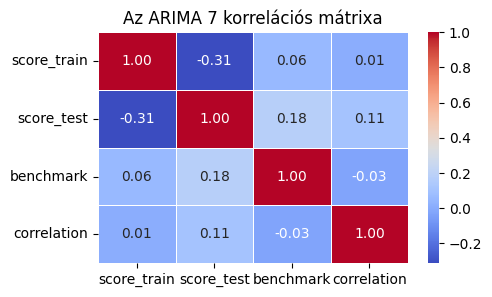

In [533]:
correlation_matrix = arima7_corr.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Az ARIMA 7 korrelációs mátrixa")
plt.show()

In [536]:
portfolio_return = []
for i in pred_arima7.index:
    weekly_return = dict(pred_arima7.loc[i])
    sorted_return = dict(sorted(weekly_return.items(), key = lambda x: -x[1]))
    stocks_to_invest = list(sorted_return.keys())[:40]
    portfolio_return.append(data.resample("W").last().pct_change().dropna().loc[i][stocks_to_invest].mean())

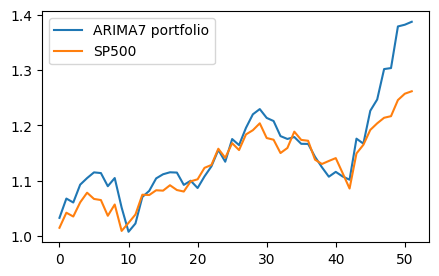

In [538]:
#portfolio_return = portf_return7(pred_arima7)

a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500_price.resample("W").last().pct_change().dropna()["2023-01-01":])+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "ARIMA7 portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()

In [540]:
score_lstm = pd.read_csv("LSTMscore.csv", index_col=0)

pred_lstm  = pd.read_csv("LSTMpred.csv", index_col =0)
pred_lstm.index = data["2022-12-31":].index

In [544]:
LSTM_score.mean()

score_train   -0.886106
score_test    -1.828087
benchmark     -0.004387
correlation    0.004883
dtype: float64

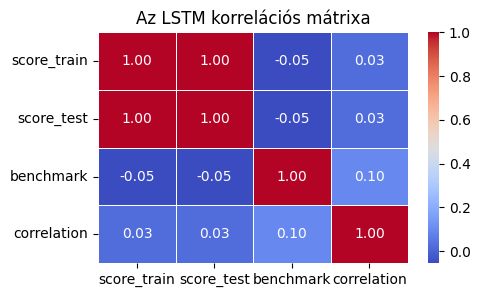

In [563]:
LSTM_score = func_score(pred_lstm, score_lstm)
correlation_matrix = LSTM_score.corr()

# Create a correlation plot
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Az LSTM korrelációs mátrixa")
plt.show()

In [561]:
rel_index = LSTM_score.sort_values(by = "score_train", ascending = False)[:300].index
#LSTM_score[:200]

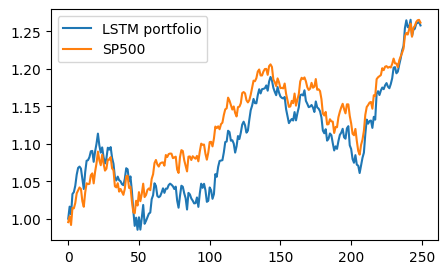

In [562]:
portfolio_return = portf_return(pred_lstm[rel_index])

a=np.cumprod(np.array(portfolio_return)+1)
b=np.cumprod(np.array(sp500["2023-01-01":])+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "LSTM portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()

In [ ]:
def portf_return(pred):
    pred = pred["2022-12-31":]
    portfolio_return = []
    for i in pred.index:
        weekly_return = dict(pred.loc[i])
        sorted_return = dict(sorted(weekly_return.items(), key = lambda x: -x[1]))
        stocks_to_invest = list(sorted_return.keys())[:40]
        portfolio_return.append(data_ret.loc[i][stocks_to_invest].mean())
        
    return portfolio_return

In [6]:
data.loc[data.index[0]].mean()

34.94494473774518

In [13]:
market_return = []
for i in data_ret["2023-01-01":].index:
    market_return.append(data_ret.loc[i].mean())
    

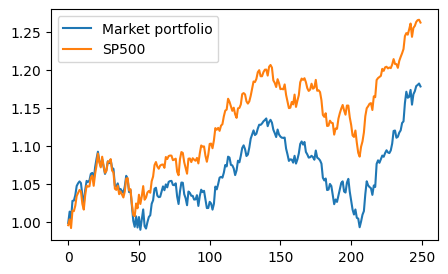

In [15]:
a=np.cumprod(np.array(market_return)+1)
b=np.cumprod(np.array(sp500["2023-01-01":])+1)

plt.figure(figsize=(5, 3))
plt.plot(a, label = "Market portfolio")
plt.plot(b, label = "SP500")
plt.legend()
plt.show()

In [1]:
sp500_list = ['A',
 'AAL',
 'AAPL',
 'ABBV',
 'ABNB',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXON',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLDR',
 'BLK',
 'BMY',
 'BR',
 'BRK.B',
 'BRO',
 'BSX',
 'BWA',
 'BX',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COR',
 'COST',
 'CPAY',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTLT',
 'CTRA',
 'CTSH',
 'CTVA',
 'CVS',
 'CVX',
 'CZR',
 'D',
 'DAL',
 'DAY',
 'DD',
 'DE',
 'DECK',
 'DFS',
 'DG',
 'DGX',
 'DHI',
 'DHR',
 'DIS',
 'DLR',
 'DLTR',
 'DOC',
 'DOV',
 'DOW',
 'DPZ',
 'DRI',
 'DTE',
 'DUK',
 'DVA',
 'DVN',
 'DXCM',
 'EA',
 'EBAY',
 'ECL',
 'ED',
 'EFX',
 'EG',
 'EIX',
 'EL',
 'ELV',
 'EMN',
 'EMR',
 'ENPH',
 'EOG',
 'EPAM',
 'EQIX',
 'EQR',
 'EQT',
 'ES',
 'ESS',
 'ETN',
 'ETR',
 'ETSY',
 'EVRG',
 'EW',
 'EXC',
 'EXPD',
 'EXPE',
 'EXR',
 'F',
 'FANG',
 'FAST',
 'FCX',
 'FDS',
 'FDX',
 'FE',
 'FFIV',
 'FI',
 'FICO',
 'FIS',
 'FITB',
 'FMC',
 'FOX',
 'FOXA',
 'FRT',
 'FSLR',
 'FTNT',
 'FTV',
 'GD',
 'GE',
 'GEHC',
 'GEN',
 'GEV',
 'GILD',
 'GIS',
 'GL',
 'GLW',
 'GM',
 'GNRC',
 'GOOG',
 'GOOGL',
 'GPC',
 'GPN',
 'GRMN',
 'GS',
 'GWW',
 'HAL',
 'HAS',
 'HBAN',
 'HCA',
 'HD',
 'HES',
 'HIG',
 'HII',
 'HLT',
 'HOLX',
 'HON',
 'HPE',
 'HPQ',
 'HRL',
 'HSIC',
 'HST',
 'HSY',
 'HUBB',
 'HUM',
 'HWM',
 'IBM',
 'ICE',
 'IDXX',
 'IEX',
 'IFF',
 'ILMN',
 'INCY',
 'INTC',
 'INTU',
 'INVH',
 'IP',
 'IPG',
 'IQV',
 'IR',
 'IRM',
 'ISRG',
 'IT',
 'ITW',
 'IVZ',
 'J',
 'JBHT',
 'JBL',
 'JCI',
 'JKHY',
 'JNJ',
 'JNPR',
 'JPM',
 'K',
 'KDP',
 'KEY',
 'KEYS',
 'KHC',
 'KIM',
 'KLAC',
 'KMB',
 'KMI',
 'KMX',
 'KO',
 'KR',
 'KVUE',
 'L',
 'LDOS',
 'LEN',
 'LH',
 'LHX',
 'LIN',
 'LKQ',
 'LLY',
 'LMT',
 'LNT',
 'LOW',
 'LRCX',
 'LULU',
 'LUV',
 'LVS',
 'LW',
 'LYB',
 'LYV',
 'MA',
 'MAA',
 'MAR',
 'MAS',
 'MCD',
 'MCHP',
 'MCK',
 'MCO',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MGM',
 'MHK',
 'MKC',
 'MKTX',
 'MLM',
 'MMC',
 'MMM',
 'MNST',
 'MO',
 'MOH',
 'MOS',
 'MPC',
 'MPWR',
 'MRK',
 'MRNA',
 'MRO',
 'MS',
 'MSCI',
 'MSFT',
 'MSI',
 'MTB',
 'MTCH',
 'MTD',
 'MU',
 'NCLH',
 'NDAQ',
 'NDSN',
 'NEE',
 'NEM',
 'NFLX',
 'NI',
 'NKE',
 'NOC',
 'NOW',
 'NRG',
 'NSC',
 'NTAP',
 'NTRS',
 'NUE',
 'NVDA',
 'NVR',
 'NWS',
 'NWSA',
 'NXPI',
 'O',
 'ODFL',
 'OKE',
 'OMC',
 'ON',
 'ORCL',
 'ORLY',
 'OTIS',
 'OXY',
 'PANW',
 'PARA',
 'PAYC',
 'PAYX',
 'PCAR',
 'PCG',
 'PEG',
 'PEP',
 'PFE',
 'PFG',
 'PG',
 'PGR',
 'PH',
 'PHM',
 'PKG',
 'PLD',
 'PM',
 'PNC',
 'PNR',
 'PNW',
 'PODD',
 'POOL',
 'PPG',
 'PPL',
 'PRU',
 'PSA',
 'PSX',
 'PTC',
 'PWR',
 'PXD',
 'PYPL',
 'QCOM',
 'QRVO',
 'RCL',
 'REG',
 'REGN',
 'RF',
 'RHI',
 'RJF',
 'RL',
 'RMD',
 'ROK',
 'ROL',
 'ROP',
 'ROST',
 'RSG',
 'RTX',
 'RVTY',
 'SBAC',
 'SBUX',
 'SCHW',
 'SHW',
 'SJM',
 'SLB',
 'SMCI',
 'SNA',
 'SNPS',
 'SO',
 'SOLV',
 'SPG',
 'SPGI',
 'SRE',
 'STE',
 'STLD',
 'STT',
 'STX',
 'STZ',
 'SWK',
 'SWKS',
 'SYF',
 'SYK',
 'SYY',
 'T',
 'TAP',
 'TDG',
 'TDY',
 'TECH',
 'TEL',
 'TER',
 'TFC',
 'TFX',
 'TGT',
 'TJX',
 'TMO',
 'TMUS',
 'TPR',
 'TRGP',
 'TRMB',
 'TROW',
 'TRV',
 'TSCO',
 'TSLA',
 'TSN',
 'TT',
 'TTWO',
 'TXN',
 'TXT',
 'TYL',
 'UAL',
 'UBER',
 'UDR',
 'UHS',
 'ULTA',
 'UNH',
 'UNP',
 'UPS',
 'URI',
 'USB',
 'V',
 'VICI',
 'VLO',
 'VLTO',
 'VMC',
 'VRSK',
 'VRSN',
 'VRTX',
 'VTR',
 'VTRS',
 'VZ',
 'WAB',
 'WAT',
 'WBA',
 'WBD',
 'WDC',
 'WEC',
 'WELL',
 'WFC',
 'WM',
 'WMB',
 'WMT',
 'WRB',
 'WRK',
 'WST',
 'WTW',
 'WY',
 'WYNN',
 'XEL',
 'XOM',
 'XYL',
 'YUM',
 'ZBH',
 'ZBRA',
 'ZTS']